In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel(r"F:\Downloads\archive (12)\eBayAuctions (1).xlsx","eBay auctions")
df

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1


In [3]:
df.shape

(1972, 8)

In [4]:
df.isnull().sum()

Category        0
currency        0
sellerRating    0
Duration        0
endDay          0
ClosePrice      0
OpenPrice       0
Competitive?    0
dtype: int64

In [5]:
df.columns

Index(['Category', 'currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive?'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [7]:
df.describe()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926268,0.540568
std,5973.011033,2.052906,89.493858,38.856149,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sellerRating,1972.0,3560.238337,5973.011033,0.00,595.0000,1853.000,3380.00,37727.0
Duration,1972.0,6.486308,2.052906,1.00,5.0000,7.000,7.00,10.0
ClosePrice,1972.0,36.449087,89.493858,0.01,4.9075,9.995,28.00,999.0
OpenPrice,1972.0,12.926268,38.856149,0.01,1.2300,4.500,9.99,999.0
Competitive?,1972.0,0.540568,0.498478,0.00,0.0000,1.000,1.00,1.0


In [9]:
df.describe(include="all")

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
count,1972,1972,1972.000000,1972.000000,1972,1972.000000,1972.000000,1972.000000
unique,18,3,NaN,NaN,7,NaN,NaN,NaN
top,Music/Movie/Game,US,NaN,NaN,Mon,NaN,NaN,NaN
freq,403,1292,NaN,NaN,548,NaN,NaN,NaN
mean,NaN,NaN,3560.238337,6.486308,NaN,36.449087,12.926268,0.540568
std,NaN,NaN,5973.011033,2.052906,NaN,89.493858,38.856149,0.498478
min,NaN,NaN,0.000000,1.000000,NaN,0.010000,0.010000,0.000000
25%,NaN,NaN,595.000000,5.000000,NaN,4.907500,1.230000,0.000000
50%,NaN,NaN,1853.000000,7.000000,NaN,9.995000,4.500000,1.000000
75%,NaN,NaN,3380.000000,7.000000,NaN,28.000000,9.990000,1.000000


In [10]:
df_cat=df.select_dtypes(include=["object"])

In [11]:
df_num=df.select_dtypes(include=[np.number])

In [12]:
df_num_corr=df_num.corr()
df_num_corr

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
sellerRating,1.000000,-0.149734,0.000158,-0.041113,-0.033956
Duration,-0.149734,1.000000,-0.090714,-0.085289,-0.026478
ClosePrice,0.000158,-0.090714,1.000000,0.476931,0.178458
OpenPrice,-0.041113,-0.085289,0.476931,1.000000,-0.096646
Competitive?,-0.033956,-0.026478,0.178458,-0.096646,1.000000


In [13]:
df_num_corr["Competitive?"]

sellerRating   -0.033956
Duration       -0.026478
ClosePrice      0.178458
OpenPrice      -0.096646
Competitive?    1.000000
Name: Competitive?, dtype: float64

In [14]:
df["Competitive?"].unique()

array([0, 1], dtype=int64)

In [15]:
df_num_cols=[]
df_num_cols.extend(df_num_corr[(df_num_corr["Competitive?"]>0.1)].index.values)
df_num_cols.extend(df_num_corr[(df_num_corr["Competitive?"]<-0.1)].index.values)

In [16]:
df_num_cols

['ClosePrice', 'Competitive?']

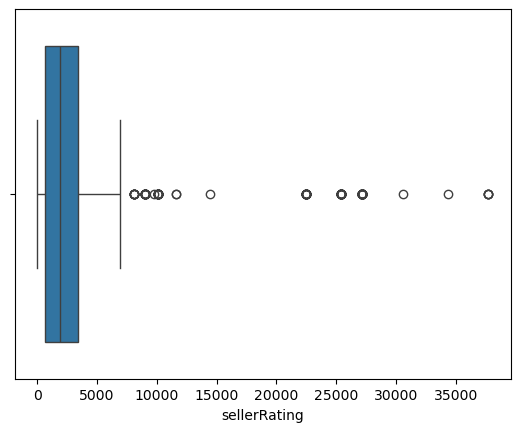

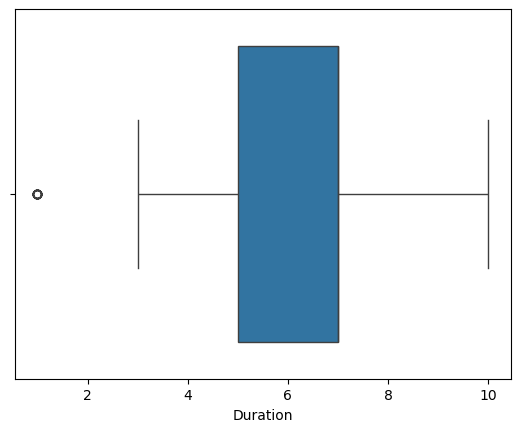

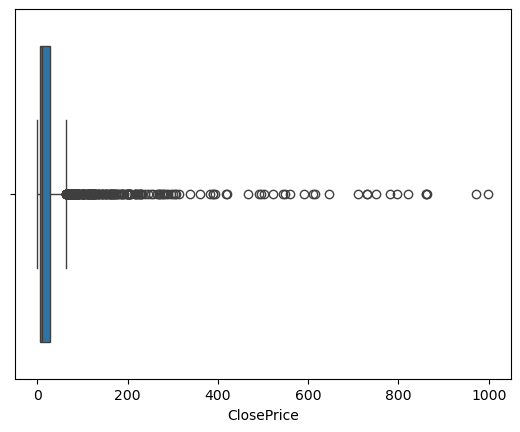

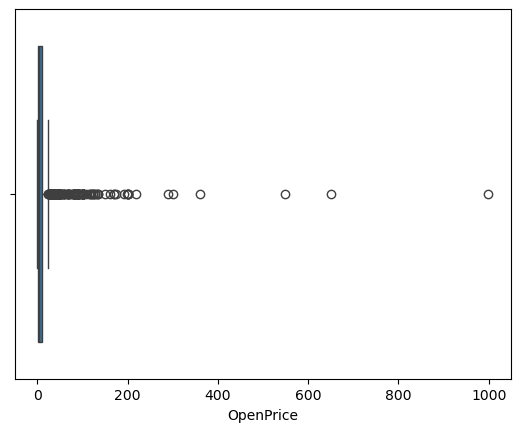

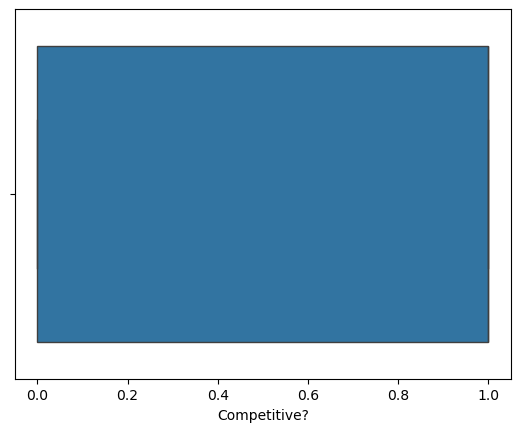

In [17]:
for i in df_num:
  sns.boxplot(x=i,data=df_num)
  plt.show()

In [18]:
for i in df_num_cols:
  print(f"{i}:{df_num[i].skew()}")

ClosePrice:6.057248134018288
Competitive?:-0.16293253806874095


In [19]:
for i in ["ClosePrice","OpenPrice"]:
  df_num[i]=np.log(df_num[i])

In [20]:
for i in df_num_cols:
  print(f"{i}:{df_num[i].skew()}")

ClosePrice:-0.6689343167828373
Competitive?:-0.16293253806874095


In [21]:
# df_num=df_num[df_num_cols]

In [22]:
df_num.head()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
0,3249,5,-4.60517,-4.60517,0
1,3249,5,-4.60517,-4.60517,0
2,3249,5,-4.60517,-4.60517,0
3,3249,5,-4.60517,-4.60517,0
4,3249,5,-4.60517,-4.60517,0


In [23]:
def outliers_detection(data,columns):
  for col in columns:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    LB=q1-1.5*iqr
    UB=q3+1.5*iqr
    data=data[(df[col]>=LB)&(df[col]<=UB)]
  return data

In [24]:
# columns=['sellerRating', 'Duration', 'ClosePrice', 'OpenPrice', 'Competitive?']
df_f_num=outliers_detection(df_num,list(df_num.columns))
print(f"{df_num.shape}")
print(f"{df_f_num.shape}")

(1972, 5)
(398, 5)


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cat1=df_cat.apply(le.fit_transform)
df_cat1

,Category,currency,endDay
0,13,2,1
1,13,2,1
2,13,2,1
3,13,2,1
4,13,2,1
...,...,...,...
1967,1,2,3
1968,1,2,2
1969,1,2,1
1970,1,2,0


In [26]:
df_f_cat=df_cat1.loc[df_f_num.index,:]

In [27]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# ssc=scaler.fit_transform(df_f_num)

In [28]:
# from sklearn.preprocessing import StandardScaler

# # Ensure 'outliers_detection' is a DataFrame
# if isinstance(outliers_detection, pd.DataFrame):
#     # Create a copy of the DataFrame
#     df_standard_scaled = outliers_detection.copy()
    
#     # Apply StandardScaler to the specified columns
#     df_standard_scaled[columns_to_scale] = StandardScaler().fit_transform(outliers_detection[columns_to_scale])
# else:
#     print("Error: 'outliers_detection' must be a DataFrame.")


In [29]:
final_df=pd.concat([df_f_num,df_f_cat],axis=1)
final_df

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?,Category,currency,endDay
0,3249,5,-4.605170,-4.605170,0,13,2,1
1,3249,5,-4.605170,-4.605170,0,13,2,1
2,3249,5,-4.605170,-4.605170,0,13,2,1
3,3249,5,-4.605170,-4.605170,0,13,2,1
4,3249,5,-4.605170,-4.605170,0,13,2,1
...,...,...,...,...,...,...,...,...
543,3090,10,1.719189,0.896088,1,17,0,5
544,5827,10,1.743969,0.896088,1,17,0,6
569,3385,7,1.386294,1.011601,1,17,2,2
637,3385,7,1.706565,1.011601,1,17,2,2


In [30]:
final_df.shape

(398, 8)

In [31]:
df.columns

Index(['Category', 'currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive?'],
      dtype='object')

In [32]:
df_f_num.shape

(398, 5)

In [33]:
final_df

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?,Category,currency,endDay
0,3249,5,-4.605170,-4.605170,0,13,2,1
1,3249,5,-4.605170,-4.605170,0,13,2,1
2,3249,5,-4.605170,-4.605170,0,13,2,1
3,3249,5,-4.605170,-4.605170,0,13,2,1
4,3249,5,-4.605170,-4.605170,0,13,2,1
...,...,...,...,...,...,...,...,...
543,3090,10,1.719189,0.896088,1,17,0,5
544,5827,10,1.743969,0.896088,1,17,0,6
569,3385,7,1.386294,1.011601,1,17,2,2
637,3385,7,1.706565,1.011601,1,17,2,2


In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
ssc=scaler.fit_transform(df_f_num)
ssc

array([[ 0.64179803, -0.94532176, -3.70293328, -1.74024725, -1.02030664],
       [ 0.64179803, -0.94532176, -3.70293328, -1.74024725, -1.02030664],
       [ 0.64179803, -0.94532176, -3.70293328, -1.74024725, -1.02030664],
       ...,
       [ 0.72699607,  0.03702305,  0.67318152,  0.80647178,  0.98009751],
       [ 0.72699607,  0.03702305,  0.9071042 ,  0.80647178,  0.98009751],
       [ 0.72699607,  0.03702305,  0.93058309,  0.80647178,  0.98009751]])

In [35]:
x=final_df.drop("Competitive?",axis=1)
y=final_df["Competitive?"]

In [36]:
x

,sellerRating,Duration,ClosePrice,OpenPrice,Category,currency,endDay
0,3249,5,-4.605170,-4.605170,13,2,1
1,3249,5,-4.605170,-4.605170,13,2,1
2,3249,5,-4.605170,-4.605170,13,2,1
3,3249,5,-4.605170,-4.605170,13,2,1
4,3249,5,-4.605170,-4.605170,13,2,1
...,...,...,...,...,...,...,...
543,3090,10,1.719189,0.896088,17,0,5
544,5827,10,1.743969,0.896088,17,0,6
569,3385,7,1.386294,1.011601,17,2,2
637,3385,7,1.706565,1.011601,17,2,2


In [37]:
y

0      0
1      0
2      0
3      0
4      0
      ..
543    1
544    1
569    1
637    1
644    1
Name: Competitive?, Length: 398, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [39]:
x_train

,sellerRating,Duration,ClosePrice,OpenPrice,Category,currency,endDay
210,1550,7,0.207014,0.207014,0,0,1
162,1029,7,0.530628,0.223144,13,1,4
17,3115,7,-4.605170,-4.605170,1,2,5
313,15,10,1.128171,0.207014,2,0,3
26,3249,5,-2.207275,-4.605170,13,2,1
...,...,...,...,...,...,...,...
73,3249,5,1.321756,-4.605170,13,2,1
156,1029,7,0.223144,0.223144,13,1,4
330,743,3,1.178655,0.000000,12,2,2
426,1545,10,1.118415,0.896088,6,0,1


In [40]:
y_train

210    0
162    1
17     0
313    1
26     1
      ..
73     1
156    1
330    1
426    1
152    0
Name: Competitive?, Length: 278, dtype: int64

In [41]:
x_test

,sellerRating,Duration,ClosePrice,OpenPrice,Category,currency,endDay
251,5701,10,0.207014,0.207014,11,0,5
637,3385,7,1.706565,1.011601,17,2,2
35,3249,5,0.223144,-4.605170,13,2,1
265,53,7,0.943906,0.570980,11,1,4
96,3249,5,1.708378,-4.605170,13,2,1
...,...,...,...,...,...,...,...
62,3249,5,1.178655,-4.605170,13,2,1
81,3249,5,1.446919,-4.605170,13,2,1
351,104,7,0.896088,0.896088,13,0,4
375,300,10,0.896088,0.896088,17,0,6


In [42]:
y_test

251    0
637    1
35     1
265    1
96     1
      ..
62     1
81     1
351    0
375    0
344    0
Name: Competitive?, Length: 120, dtype: int64

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [44]:
log_reg.score(x_train,y_train)

0.9064748201438849

In [45]:
log_reg.score(x_test,y_test)

0.9333333333333333

In [46]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [47]:
from sklearn.model_selection import cross_val_score
cff=cross_val_score(log_reg,x_train,y_train,scoring="accuracy",cv=5).mean()
cff

0.8701948051948051

In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[61,  7],
       [ 1, 51]], dtype=int64)

<Axes: >

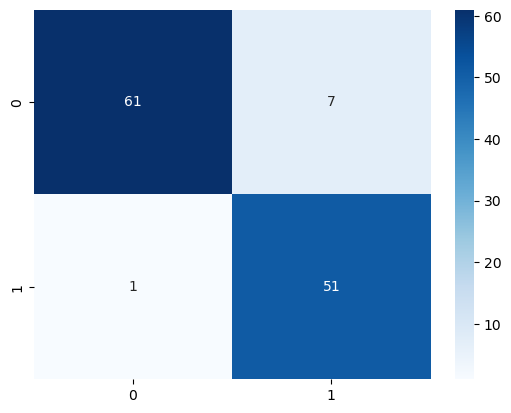

In [49]:
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")

In [50]:
from sklearn.metrics import classification_report 
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        68
           1       0.88      0.98      0.93        52

    accuracy                           0.93       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



In [51]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning (example for Logistic Regression)
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization solvers
    'max_iter': [100, 200, 300]  # Maximum iterations
}

# Instantiate GridSearchCV
gdf = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit to the training data
gdf.fit(x_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", gdf.best_params_)
print("Best Score:", gdf.best_score_)


Best Parameters: {'C': 10, 'max_iter': 200, 'solver': 'lbfgs'}
Best Score: 0.9351948051948051


In [52]:
gdf.score(x_train,y_train)

0.935251798561151

In [53]:
gdf.score(x_test,y_test)

0.9666666666666667